In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [ ]:
#loading and exploring the texas roadhouse dataset.
df = pd.read_csv("trhCensusDf_updated.csv")
df.head(2)

,name,address,state_x,rating,totalUserRatings,placeID,latitude,longitude,ZIP,city,...,disabilityPopulation,healthInsurancePopulation,householdPopulation,singleParentHouseholds,marriedPopulation,state_y,place,successMetric,geometry,nearestDistanceToTRH
0,Texas Roadhouse,"60 Drivers Way, Pelham, AL 35124, United States",AL,4.4,4042.0,ChIJbxTi4gcjiYgROGvRh67OSkU,33.339564,-86.781546,35124.0,pelham,...,23690,23690,9262,6166,19511,1.0,58848.0,17784.8,POINT (-86.7815464 33.339564),44.029743
1,Texas Roadhouse,"2621 Legends Pkwy, Prattville, AL 36066, Unite...",AL,3.9,155.0,ChIJ21fyJjWFjogRypHfBrGhPv8,32.457379,-86.402205,36066.0,prattville,...,35372,35372,14271,10091,29471,1.0,62328.0,604.5,POINT (-86.4022052 32.4573787),15.531516


In [ ]:
df.describe()

,rating,totalUserRatings,latitude,longitude,ZIP,stateFIPS,placeFIPS,totalPopulation,malePopulation,femalePopulation,...,carAvailability,disabilityPopulation,healthInsurancePopulation,householdPopulation,singleParentHouseholds,marriedPopulation,state_y,place,successMetric,nearestDistanceToTRH
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02,5.970000e+02,5.970000e+02,...,597.000000,5.970000e+02,5.970000e+02,597.000000,597.000000,5.970000e+02,597.000000,597.000000,597.000000,597.000000
mean,4.351591,3590.132328,37.223995,-89.811102,50224.825796,29.180905,42552.738693,1.350500e+05,6.629871e+04,6.875125e+04,...,51095.517588,1.330023e+05,1.330023e+05,51095.517588,30498.752094,1.087663e+05,29.180905,42552.738693,15712.980067,27.200148
std,0.140176,1701.688767,4.830041,12.220468,24817.103506,15.953080,23720.722136,2.495405e+05,1.233435e+05,1.262292e+05,...,90975.265588,2.469647e+05,2.469647e+05,90975.265588,54889.989132,1.983996e+05,15.953080,23720.722136,7560.577483,26.517130
min,3.500000,3.000000,25.459587,-123.103621,1128.000000,1.000000,160.000000,1.100000e+02,4.600000e+01,6.400000e+01,...,36.000000,1.100000e+02,1.100000e+02,36.000000,20.000000,8.700000e+01,1.000000,160.000000,11.100000,0.000000
25%,4.300000,2505.000000,33.578662,-96.556531,31322.000000,16.000000,22502.000000,2.773000e+04,1.333200e+04,1.420300e+04,...,10805.000000,2.720700e+04,2.720700e+04,10805.000000,6281.000000,2.272200e+04,16.000000,22502.000000,10819.600000,10.892056
50%,4.400000,3730.000000,38.439425,-86.339607,46706.000000,29.000000,42032.000000,5.731800e+04,2.767700e+04,2.887100e+04,...,21871.000000,5.555400e+04,5.555400e+04,21871.000000,13044.000000,4.619800e+04,29.000000,42032.000000,16183.200000,17.913990
75%,4.400000,4754.000000,40.750194,-81.296314,75028.000000,44.000000,61892.000000,1.174880e+05,5.727800e+04,6.037000e+04,...,46586.000000,1.155190e+05,1.155190e+05,46586.000000,27506.000000,9.486100e+04,44.000000,61892.000000,20916.000000,32.677558
max,4.600000,9127.000000,48.798766,-68.756095,99336.000000,56.000000,88240.000000,2.313238e+06,1.152063e+06,1.161175e+06,...,874827.000000,2.296993e+06,2.296993e+06,874827.000000,526874.000000,1.829104e+06,56.000000,88240.000000,41071.500000,186.427104


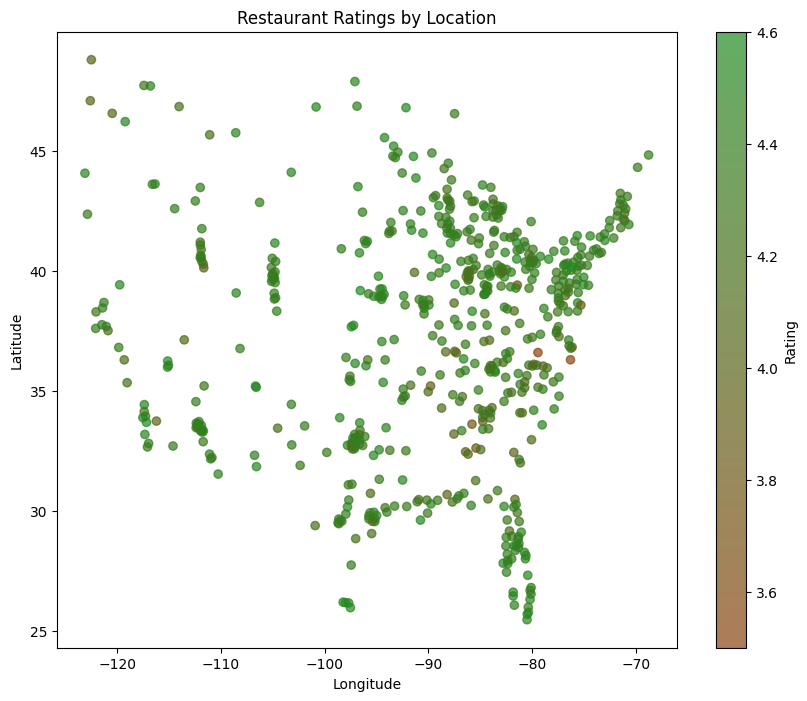

In [ ]:
#defining colors and creating a custom gradient color map.
colorToStart = "#8B4513"
colorToFinish = "#228B22"
colorMap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", [colorToStart, colorToFinish])
#normalizing ratings so they can be represented by the gradient.
norm = mcolors.Normalize(vmin=df['rating'].min(), vmax=df['rating'].max())
#constructing a scatterplot using the gradient.
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['rating'], cmap=colorMap, norm=norm, alpha=0.7)
plt.colorbar(scatter, label="Rating")
plt.title("Restaurant Ratings by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

<Figure size 1200x600 with 0 Axes>

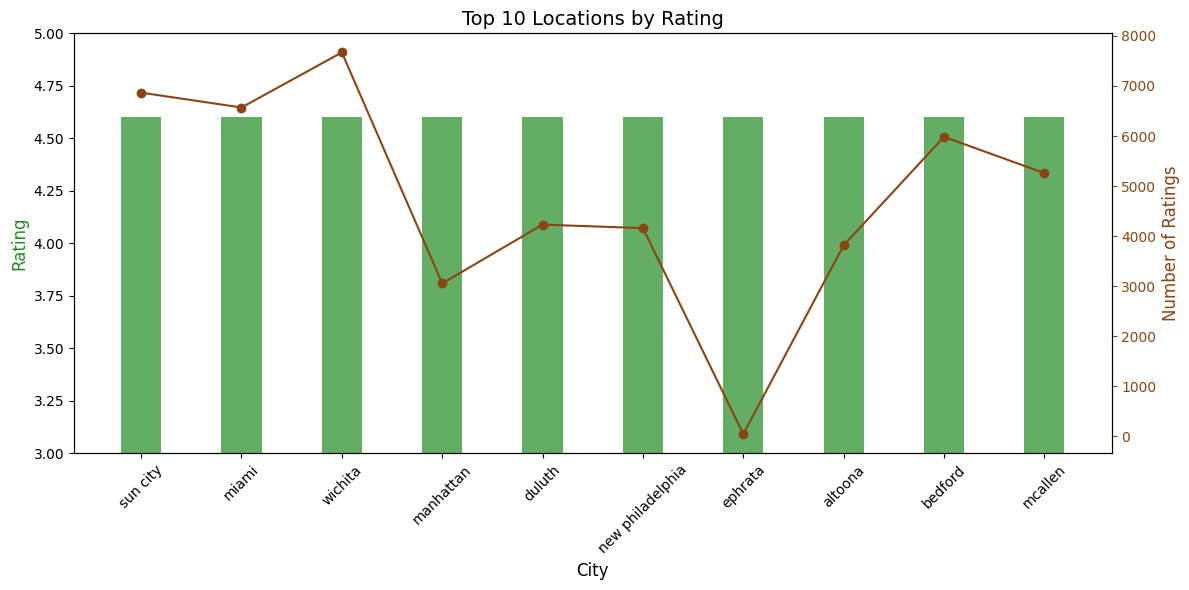

In [ ]:
#filtering and visualizing the top 10 restaurants by rating.
top10 = df.nlargest(10, 'rating')
plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(12, 6))
#constructing a bar chart of ratings, with a secondary axis for total number of ratings.
ax1.bar(top10['city'], top10['rating'], color='#228B22', alpha=0.7, label='Rating', width=0.4)
ax1.set_ylabel('Rating', fontsize=12, color='#228B22')
ax1.set_ylim(3, 5)
ax1.set_xlabel('City', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax2 = ax1.twinx()
ax2.plot(top10['city'], top10['totalUserRatings'], color='#8B4513', marker='o', label='Number of Ratings')
ax2.set_ylabel('Number of Ratings', fontsize=12, color='#8B4513')
#ax2.set_ylim(0, 8000)
ax2.tick_params(axis='y', colors='#8B4513')
plt.title('Top 10 Locations by Rating', fontsize=14)
fig.tight_layout()
plt.show()

In [ ]:
#creating an interactive map to visualize business density.
map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)
clusterMarker = MarkerCluster().add_to(map)

for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"City: {row['city']}<br>Success Metric: {row['successMetric']}<br>"
              f"Rating: {row['rating']}<br>Total User Ratings: {row['totalUserRatings']}",
        icon=folium.Icon(color="green")
    ).add_to(clusterMarker)
#saving the map to an HTML file so it can be embedded into a PowerPoint.
map.save("mapOfBusinessDensity.html")

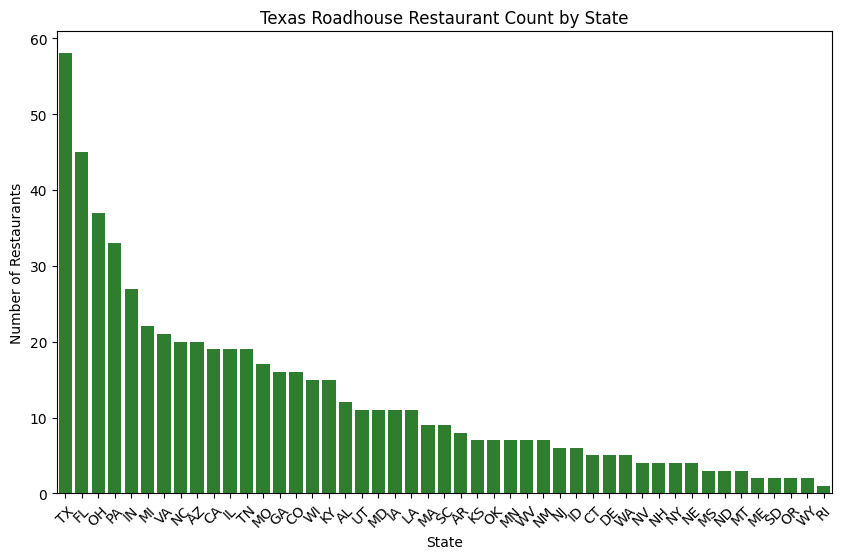

In [ ]:
#constructing a bar plot of number of restaurants by state.
restaurantCountbyState = df['state_x'].value_counts().reset_index()
restaurantCountbyState.columns = ['State', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(data=restaurantCountbyState, x='State', y='Count', color="#228B22")
plt.title("Texas Roadhouse Restaurant Count by State")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Number of Restaurants")
plt.show()

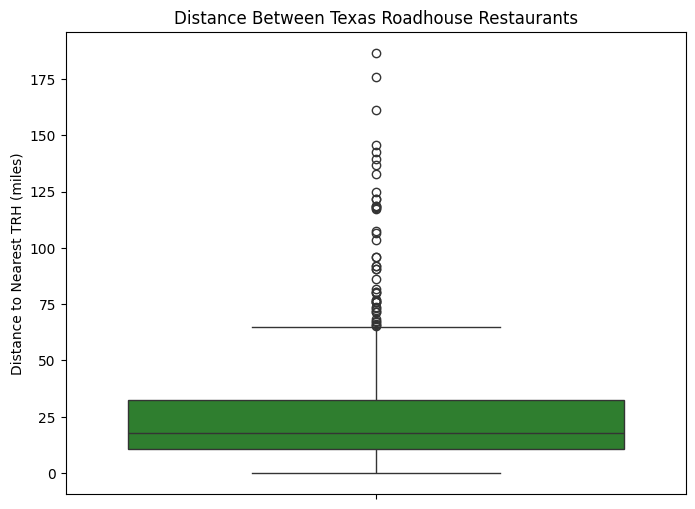

In [ ]:
#creating a box plot for distance to nearest Texas Roadhouse.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='nearestDistanceToTRH', color='#228B22')
plt.title("Distance Between Texas Roadhouse Restaurants")
plt.ylabel("Distance to Nearest TRH (miles)")
plt.show()